# Task 2 - To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a
day?

## Loading Data and performing basic operations


In [1]:
# importing the required libraries
import pandas as pd

In [2]:
# reading the data form the url
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
# printing the data 
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# gives some basic statistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# gives concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
# finding total number of entries
data.count()

Hours     25
Scores    25
dtype: int64

In [7]:
# finding if any null values are present
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Plottings

In [8]:
# to plot import required libraries
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline is used to display the plottings with out show function

Text(0,0.5,'Scores')

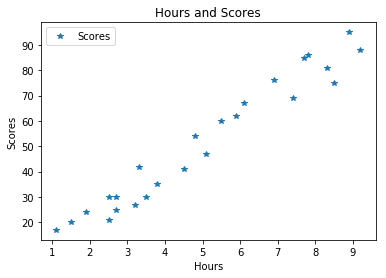

In [9]:
# plotting
data.plot(x='Hours',y='Scores',style='*')
# plotted graph title
plt.title("Hours and Scores")
# x-axis label
plt.xlabel("Hours")
# y-axis label
plt.ylabel("Scores")

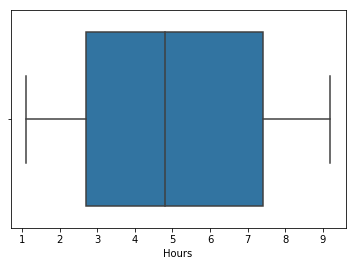

In [10]:
# import required libraries for boxplot to find outliers
import seaborn as sns
sns.boxplot(x=data["Hours"])

## Preparing Data

In [11]:
# taking both independent and dependent variables
# independent variable
X=data.iloc[:,:-1].values
# dependent variable
y=data.iloc[:,1].values

Performing train_test_split

In [12]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Training the Model

In [13]:
# import the libraries required for training the model
from sklearn.linear_model import LinearRegression

In [14]:
# creating linear regression object
lin=LinearRegression()

In [15]:
# train the model using training data
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

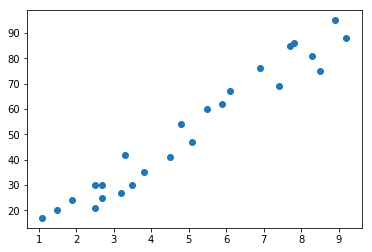

In [16]:
# scatter plot of test data
plt.scatter(X,y)

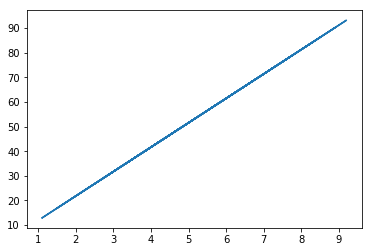

In [17]:
# making a plot with regression line
reg_line=lin.coef_*X+lin.intercept_
plt.plot(X,reg_line)

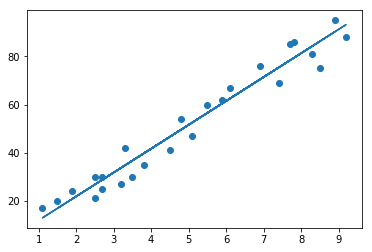

In [18]:
# regression line and scatter plot
plt.scatter(X,y)
plt.plot(X,reg_line)

## Predictions 

In [19]:
# X_test data to predict the new y values
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [20]:
# predicting the y values by passing X_test values
y_pred=lin.predict(X_test)

In [21]:
# making a data frame of original values of y_test and newly predicted values
df=pd.DataFrame({"Actual":y_test,"Predictions":y_pred})

In [22]:
# printing the data frame with actual y_test values and newly predicted values
df

,Actual,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting the Score for 9.25 hours

In [23]:
# considering a new variable hours and assigning the no of hours
hours=9.25
# predicting by passing the value of hour to the model
hour_pred=lin.predict(hours)
# printing the score for given no of hours
print("Predicted Score:",hour_pred[0])

Predicted Score: 93.69173248737538


In [24]:
print("Predicted Score {} for {} hours".format(hour_pred[0],hours))

Predicted Score 93.69173248737538 for 9.25 hours


## Model Evaluation

In [25]:
# importing the required library to evaluate the current model
from sklearn import metrics

In [26]:
# passing the actual y_test values and the newly predicted values
# the model with lower value of error performs well
error=metrics.mean_absolute_error(y_test,y_pred)

In [27]:
# printing the error value
print("Mean Absolute Error:",error)

Mean Absolute Error: 4.183859899002975
